# I-94 Interstate Highway traffic indicators

1. The `I-94 Interstate Highway dataset` is recorded from a station midway between Minneapolis and Saint Paul. The Station only records westbound traffic (cars moving east to west).
2. The `goal of this analysis` is to find insights about realtions between heavy traffic (`traffic_volume`) and time or weather related data.
3. Summary of the `results`: Looking at time and weather-related data, following points emerged from the daytime segment of the data.
   
    - Traffic volume is higher on warmer seasons, weekdays (specially Wednesday til Friday).
    - Hourly patterns shows rush hour at around 7.30 and 16 hour on business days.
    - Traffic volume was highest (~ 5000 cars per hour) at three of `weather_description` categories:
        1. light rain and snow 
        2. proximity thunderstorm with drizzle
        3. shower snow
        
        
4. Data can be downloaded from [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume).
5. Prospects: Anlyzing the night time data for the further indicators of heavy traffic.

## The I-94 dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

traffic = pd.read_csv('../my_datasets/Metro_Interstate_Traffic_Volume.csv')
traffic.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [2]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


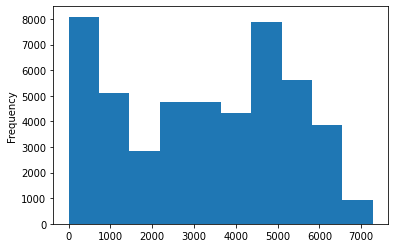

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [13]:
traffic['traffic_volume'].plot.hist()
plt.show()

traffic['traffic_volume'].describe()

## Initial Observations
- `data_time` column needs transformation from object type.
- `traffic_volume` values most frequent occuring range is ~ 0 to 750 and betweem ~ 4500 to 5150. The first one could be associated with the nighttime traffic and the other daytime.

In [4]:
traffic['date_time'] = pd.to_datetime(traffic['date_time'])

## Spliting the data into night and day time
- Since the heavy traffic occurs during the day, I am going to focus only on daytime data.
- Daytime: between 7 a.m. to 7 p.m.
- Nighttime: between 7 p.m. to 7 a.m. 

In [5]:
daytime = traffic[traffic['date_time'].dt.hour.between(7, 19)]
nighttime = traffic[(traffic['date_time'].dt.hour > 19) | (traffic['date_time'].dt.hour < 7)]

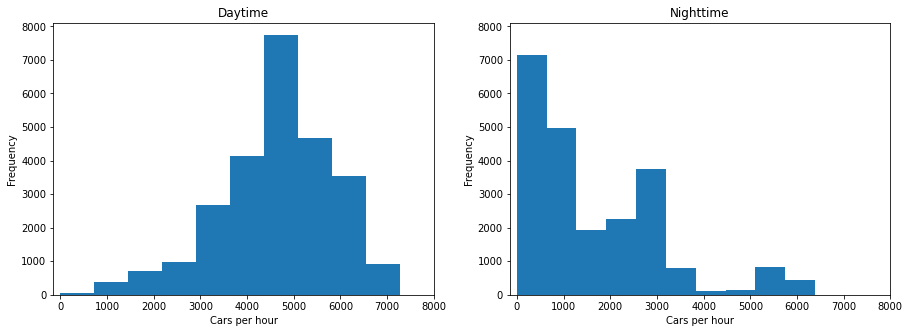

Daytime: 

 count    25838.000000
mean      4649.292360
std       1202.321987
min          0.000000
25%       4021.000000
50%       4736.000000
75%       5458.000000
max       7280.000000
Name: traffic_volume, dtype: float64 

Nighttime: 

 count    22366.000000
mean      1654.648484
std       1425.175292
min          0.000000
25%        486.000000
50%       1056.500000
75%       2630.750000
max       6386.000000
Name: traffic_volume, dtype: float64


In [18]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
daytime['traffic_volume'].plot.hist()
plt.title('Daytime')
plt.xlabel('Cars per hour')
plt.ylim([0,8100])
plt.xlim([-150,8000])

plt.subplot(1,2,2)
nighttime['traffic_volume'].plot.hist()
plt.title('Nighttime')
plt.xlabel('Cars per hour')
plt.ylim([0,8100]) # scaling the both plots to the same range
plt.xlim([-150,8000])

plt.show()

print('Daytime: \n\n', daytime['traffic_volume'].describe(), '\n')
print('Nighttime: \n\n', nighttime['traffic_volume'].describe())

## Analyzing the daytime traffic based on time-related context 

### Monthly pattern

- Traffic is heavier between March to October compare to November to February.

C:\Users\Saeed\AppData\Local\Temp/ipykernel_8440/3542731561.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daytime['month'] = daytime['date_time'].dt.month


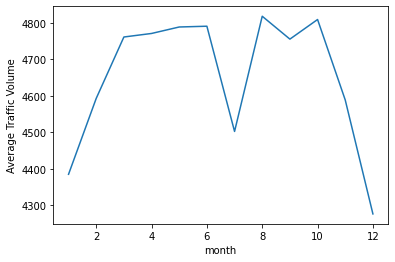

In [19]:
daytime['month'] = daytime['date_time'].dt.month
by_month = daytime.groupby('month').mean()

by_month['traffic_volume'].plot.line()
plt.ylabel('Average Traffic Volume')
plt.show()

### Weekly pattern

- Wednesday till Friday are busier on averange followed by Tuesday and Monday.
- Saturdays and Sundays are less busy than business days. 

C:\Users\Saeed\AppData\Local\Temp/ipykernel_8440/291654258.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daytime['weekday'] = daytime['date_time'].dt.dayofweek


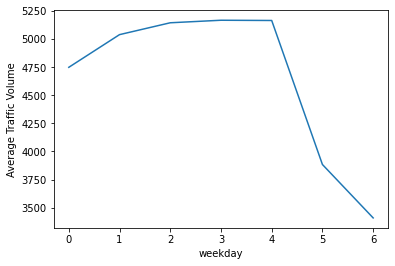

In [20]:
daytime['weekday'] = daytime['date_time'].dt.dayofweek
by_dayofweek = daytime.groupby('weekday').mean()

by_dayofweek['traffic_volume'].plot.line()
plt.ylabel('Average Traffic Volume')
plt.show()

### Hourly pattern of business days and weekends

- On business days, there are traffic peaks at around 7 a.m. and 4 p.m. and a local min of 4000 cars per hour around 10 a.m..
- On weekends, traffic peaks between 12 to 4 p.m. at around 4000 cars per hour. 

C:\Users\Saeed\AppData\Local\Temp/ipykernel_8440/2112125519.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daytime['hour'] = daytime['date_time'].dt.hour


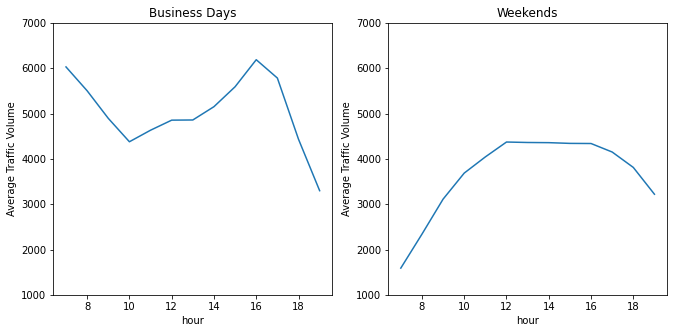

In [9]:
daytime['hour'] = daytime['date_time'].dt.hour
business_days = daytime.copy()[daytime['weekday'] <= 4]
weekends = daytime.copy()[daytime['weekday'] >= 5]

by_hour_business = business_days.groupby('hour').mean()
by_hour_weekends = weekends.groupby('hour').mean()

plt.figure(figsize=(11,5))

plt.subplot(1,2,1)
by_hour_business['traffic_volume'].plot.line()
plt.title('Business Days')
plt.ylabel('Average Traffic Volume')
plt.ylim([1000,7000])

plt.subplot(1,2,2)
by_hour_weekends['traffic_volume'].plot.line()
plt.title('Weekends')
plt.ylabel('Average Traffic Volume')
plt.ylim([1000,7000])

plt.show()

## Exploring the weather related effects on traffic


### Correlation of numerical weather related data to traffic_volume

- The strongest correlation of `traffic_volume` is with `temp`. 
- It seems that even `temp` is not a reliable indicator for heavy traffic.

In [10]:
daytime[['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main']].corrwith(daytime['traffic_volume'])

temp          0.118084
rain_1h       0.004020
snow_1h       0.003768
clouds_all   -0.033410
dtype: float64

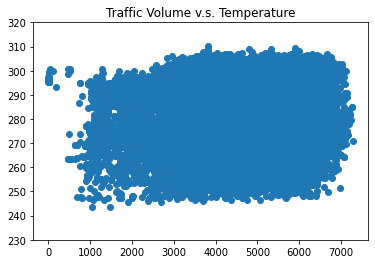

In [22]:
plt.scatter(daytime['traffic_volume'], daytime['temp'])

plt.ylim(230, 320)
plt.title('Traffic Volume v.s. Temperature')
plt.show()

### Correlation of categorical weather related data to traffic volume

- `weather_main` and `weather_description` are the categorical columns related to weather
- According to plots below, any of categories in `weather_main` does not show a correlation to `traffic_volume` and all are under 5000 cars per hour.
- On the other hand, couple of `weather_desccription` show some correlation namely, **"light rain and snow"**, **"proximity thunderstorm with drizzle"**, **"shower snow"** and **"thunderstorm with light drizzle"**.

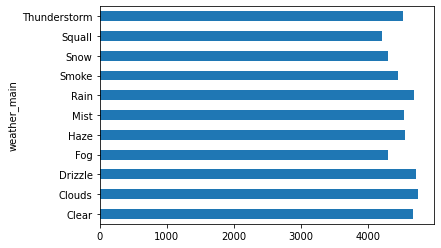

In [24]:
by_weather_main = daytime.groupby('weather_main').mean()
by_weather_description = daytime.groupby('weather_description').mean()

by_weather_main['traffic_volume'].plot.barh()
plt.show()

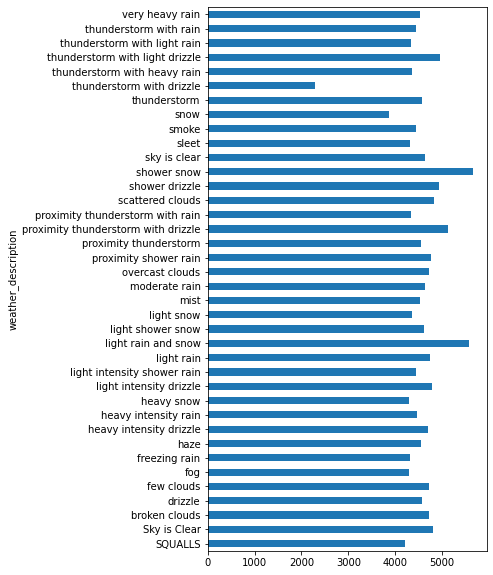

In [25]:
by_weather_description['traffic_volume'].plot.barh(figsize=[5,10])
plt.show()

## Coclusion

- Time indicatiors
    
- Weather indicators